# Prosper Load Data Analysis

### Data Information:
There are 113,937 loans in the dataset with 81 features. Most variables are both numeric and categorical in nature.

The dataset features can be split into two main categories: Borrower information & Loan performance information.

The analysis mainly focuses on the impacts to the loans by different variables, such as credit ratings, income, estimated returns and debt-income ratios etc.

In [1]:
# Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

In [2]:
# Importing the data file
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# Converting the datatype to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null datetime64[ns]
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
Prospe

In [6]:
# Counting the duplicates
df.duplicated('ListingKey').count()

113937

In [7]:
# replace NC with HR
df['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# fill NA with empty strings
df['ProsperRating (Alpha)'].fillna("", inplace = True)
df['CreditGrade'].fillna("", inplace = True)

# combine credit ratings
df['ProsperRatingCombined'] = df['ProsperRating (Alpha)'] + df['CreditGrade']

# drop rows with no credit ratings
df = df.query(' ProsperRatingCombined != ""')
# are the number of A and AA ratings the same before and after combining the columns?
(df['ProsperRatingCombined'] == 'A').sum() == (df.CreditGrade == 'A').sum() + (df['ProsperRating (Alpha)'] == 'A').sum() and \
(df['ProsperRatingCombined'] == 'AA').sum() == (df.CreditGrade == 'AA').sum() + (df['ProsperRating (Alpha)'] == 'AA').sum()
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['ProsperRatingCombined'] = df['ProsperRatingCombined'].astype(ordered_var)

### Univariable Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

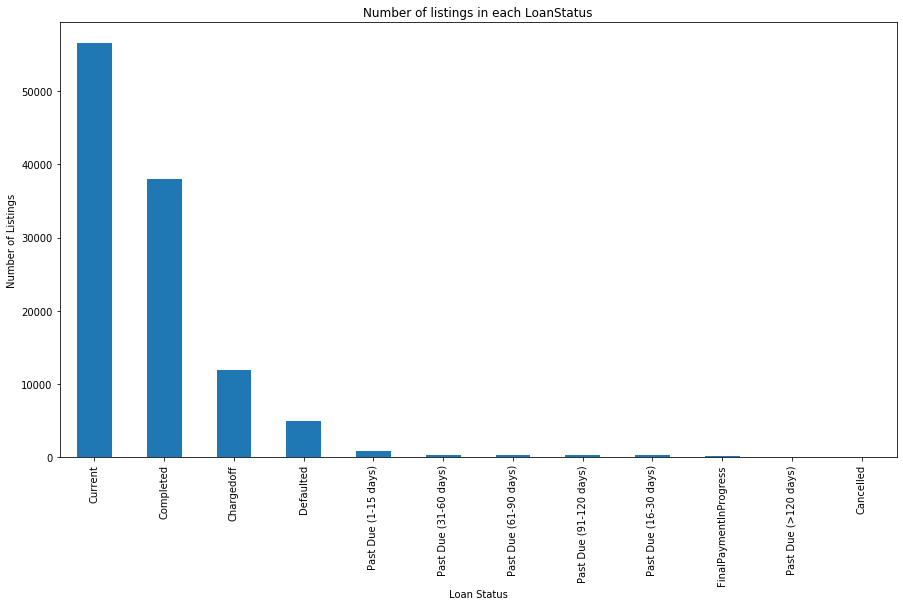

In [8]:
# Making bar-chart to see the number of each loan status
Status=df.LoanStatus.value_counts()
color = sns.color_palette()[0]

plt.figure(figsize=(15, 8))
Status.plot(kind='bar', color=color);

plt.title('Number of listings in each LoanStatus');
plt.xlabel('Loan Status');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90)

In [9]:
Status['Chargedoff']/Status['Current'], Status['Defaulted']/Status['Current']

(0.21185661764705882, 0.08864182692307693)

Finding: 

The bar-chart above indicates that the numbers of each status of loans, of which about 12000 are Charged-off, namely 21% are unlikely to be collected, while about 5000 are Defaulted, it takes about 9%.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

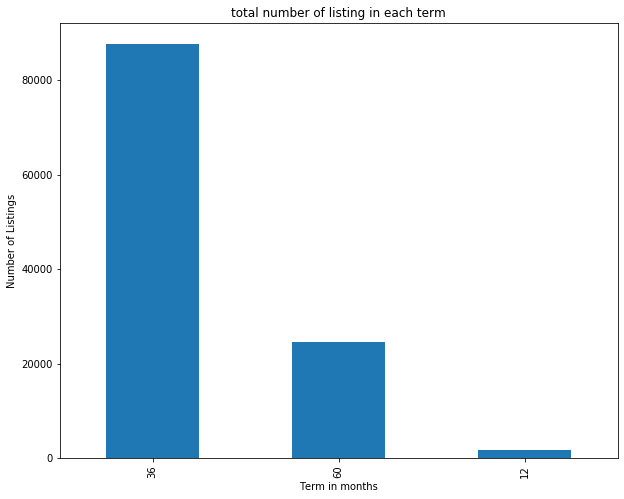

In [10]:
# Term Distribution
term=df.Term.value_counts()
color = sns.color_palette()[0]

plt.figure(figsize=(10, 8))
term.plot(kind='bar', color=color);

plt.title('total number of listing in each term');
plt.xlabel('Term in months');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90)

Finding:

The bar-chart above shows people prefer loans with 36 month payment range.

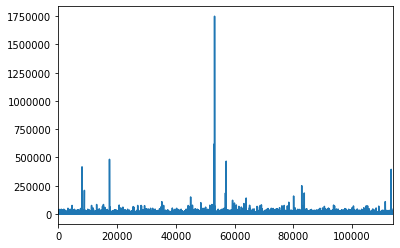

In [11]:
# Imcome plot
df.StatedMonthlyIncome.plot()

Finding:

The histogram shows the maximum of loan takers' monthly income is ranging between 50000 and 60000.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

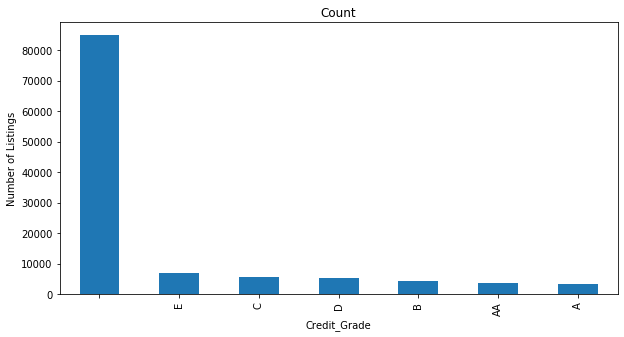

In [12]:
# Plotting credit_grades
Credit=df.CreditGrade .value_counts()
plt.figure(figsize=(10, 5))
Credit.plot(kind='bar', color=color);

plt.title('Count');
plt.xlabel('Credit_Grade');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90)

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of Borrower Debt to Income Ratio')

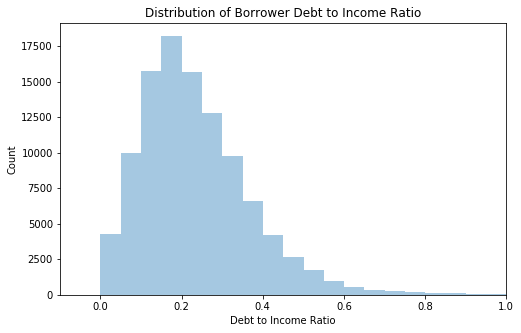

In [13]:
# Plotting Debt-Income Ratio
plt.figure(figsize = [8,5])
sns.distplot(df.DebtToIncomeRatio, kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Borrower Debt to Income Ratio')

Finding:

Most loan takers have a debt-income ratio of 20%, the distribution skews to the right.

### Bivariable Analysis

Text(0.5, 1.0, 'Number of investors vs. BorrowerRate')

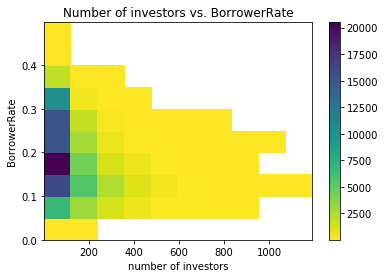

In [14]:
# Plotting the number of investor and borrow rate
df2 = df.loc[df.Investors.notnull()]

# plots the hist2d graph 
plt.hist2d(data=df2, x='Investors', y='BorrowerRate', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar()

plt.xlabel('number of investors')
plt.ylabel('BorrowerRate')
plt.title('Number of investors vs. BorrowerRate')

Findling:

The borrow rates are centered from 0.1 to 0.3, while the investor number is more spread out.

Text(0.5, 1.0, 'Distribution of Borrower Incomes')

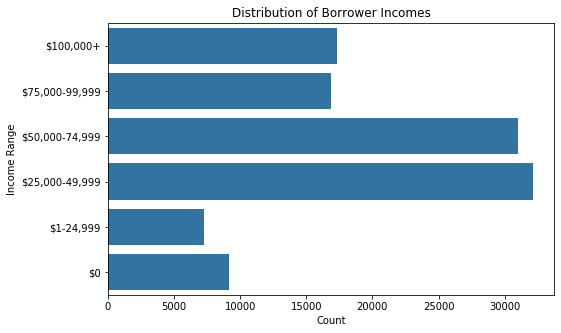

In [15]:
df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)
# Plotting the distribution of income
plt.figure(figsize = [8, 5])
sns.countplot(data = df, y = 'IncomeRange', color = color)
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Distribution of Borrower Incomes')

Finding:

From the graph we can see that the majority of loan takers have an income range from 25000 to 50000.

Text(0, 0.5, 'Borrower Income Range')

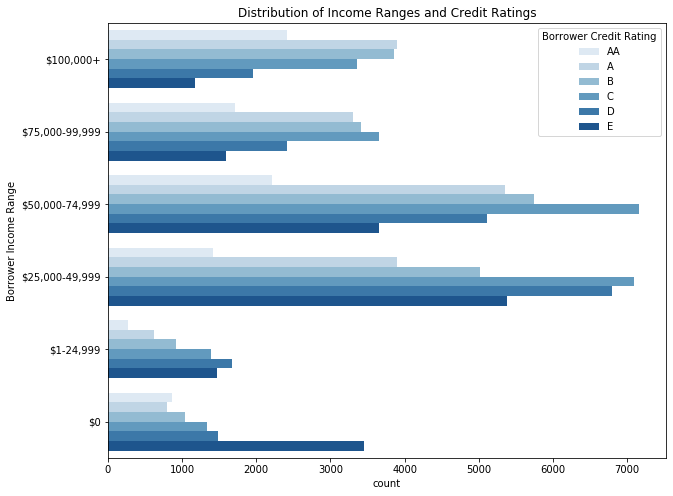

In [16]:
# Clustered bar chart of Credit Rating and Income Range
plt.figure(figsize = [10,8])

ax = sns.countplot(data = df, y = 'IncomeRange', hue = 'ProsperRatingCombined',
                   palette = 'Blues')

ax.legend(title = 'Borrower Credit Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range')

Finding:

Most of the loan takers are set in the income range of 25000 to 74999, while with lower rating scores. Except for the 75000 100000 session.

### Multivariable Analysis

Text(0.5, 1, 'Heatmap of Median Estimated Returns by Credit Rating and Income Range')

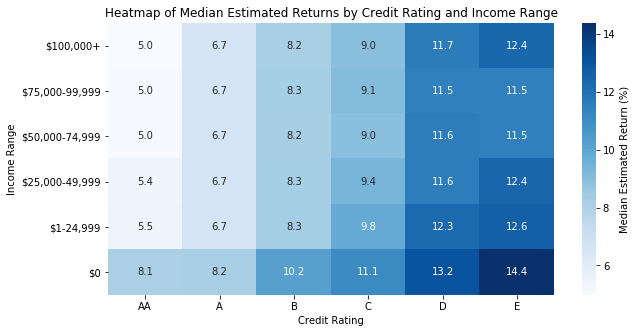

In [17]:
plt.figure(figsize = [10,5])

cat_med = df.groupby(['ProsperRatingCombined', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperRatingCombined', values = 'EstimatedReturnMedian')

sns.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Credit Rating')
plt.ylabel('Income Range')
plt.title('Heatmap of Median Estimated Returns by Credit Rating and Income Range')

Finding:

From the heatmap we can see that as the rating goes higher, the estimated return goes lower, so does income range, but not as obvious as credit rating does.